In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Generate synthetic 2D data for binary classification
np.random.seed(42)

# Class 1 (label = -1): centered around (2, 2)
class1 = np.random.randn(50, 2) * 0.6 + np.array([2, 2])
y1 = -np.ones(50)  # labels = -1

# Class 2 (label = +1): centered around (5, 4)
class2 = np.random.randn(50, 2) * 0.6 + np.array([5, 4])
y2 = np.ones(50)   # labels = +1

# Combine data
X = np.vstack([class1, class2])
y = np.hstack([y1, y2])

# Add bias term (column of 1s) to X
X_with_bias = np.column_stack([np.ones(len(X)), X])

print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Data shape: (100, 2)
Labels shape: (100,)



Learned weights: [-2.22771798  0.449229    0.22730841]
  bias (w0) = -2.2277
  w1 = 0.4492
  w2 = 0.2273


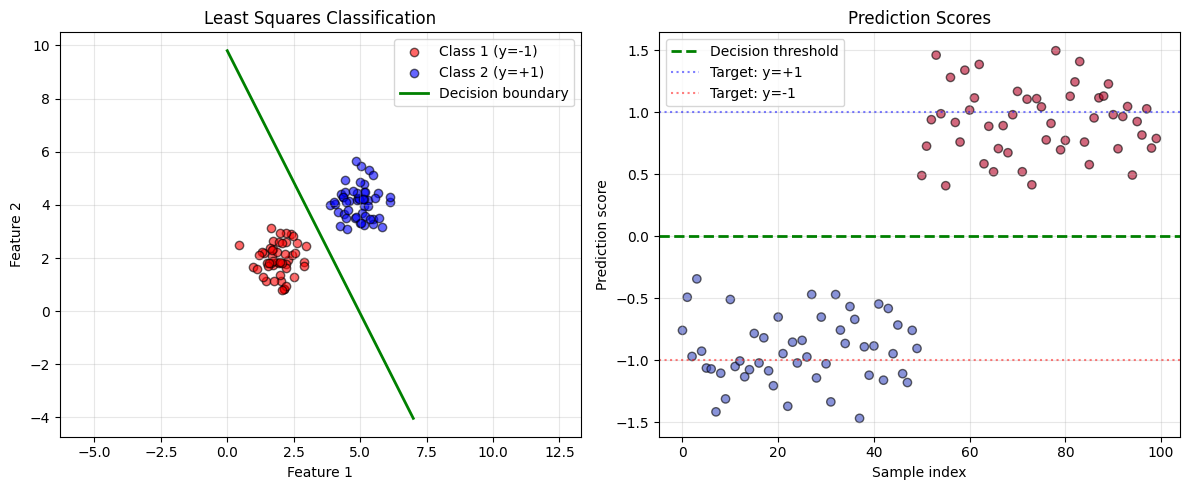


--- Testing on new points ---
Point [3. 3.]: score = -0.198, predicted class = -1
Point [4.5 3.5]: score = 0.589, predicted class = 1
Point [6. 5.]: score = 1.604, predicted class = 1


In [3]:
# LEAST SQUARES SOLUTION
# We want to minimize: ||X*w - y||^2
# Solution: w* = (X^T X)^(-1) X^T y

w = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y

print(f"\nLearned weights: {w}")
print(f"  bias (w0) = {w[0]:.4f}")
print(f"  w1 = {w[1]:.4f}")
print(f"  w2 = {w[2]:.4f}")

# Make predictions
def predict(X, w):
    """Predict class labels using learned weights"""
    X_with_bias = np.column_stack([np.ones(len(X)), X])
    scores = X_with_bias @ w
    # Use threshold at 0 (since classes are -1 and +1)
    return np.sign(scores)

# Predict on training data
y_pred = predict(X, w)

# Visualize the results
plt.figure(figsize=(12, 5))

# Plot 1: Data and decision boundary
plt.subplot(1, 2, 1)
plt.scatter(class1[:, 0], class1[:, 1], c='red', label='Class 1 (y=-1)', alpha=0.6, edgecolors='k')
plt.scatter(class2[:, 0], class2[:, 1], c='blue', label='Class 2 (y=+1)', alpha=0.6, edgecolors='k')

# Plot decision boundary: w0 + w1*x1 + w2*x2 = 0
# Solve for x2: x2 = -(w0 + w1*x1) / w2
x1_line = np.linspace(0, 7, 100)
x2_line = -(w[0] + w[1] * x1_line) / w[2]
plt.plot(x1_line, x2_line, 'g-', linewidth=2, label='Decision boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Least Squares Classification')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Plot 2: Predictions vs actual values
plt.subplot(1, 2, 2)
scores = X_with_bias @ w
plt.scatter(range(len(scores)), scores, c=y, cmap='coolwarm', alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='green', linestyle='--', linewidth=2, label='Decision threshold')
plt.axhline(y=1, color='blue', linestyle=':', alpha=0.5, label='Target: y=+1')
plt.axhline(y=-1, color='red', linestyle=':', alpha=0.5, label='Target: y=-1')
plt.xlabel('Sample index')
plt.ylabel('Prediction score')
plt.title('Prediction Scores')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Test on new data
print("\n--- Testing on new points ---")
test_points = np.array([
    [3, 3],   # Should be near class 1
    [4.5, 3.5],  # Near boundary
    [6, 5]    # Should be class 2
])

test_predictions = predict(test_points, w)
test_scores = np.column_stack([np.ones(len(test_points)), test_points]) @ w

for i, (point, pred, score) in enumerate(zip(test_points, test_predictions, test_scores)):
    print(f"Point {point}: score = {score:.3f}, predicted class = {pred:.0f}")

Weight matrix shape: (3, 3)
Weight matrix W:
[[ 0.98053665  0.92231645 -0.9028531 ]
 [ 0.12757708 -0.33061357  0.20303649]
 [-0.27879502  0.04896799  0.22982703]]

Multi-class accuracy: 78.89%


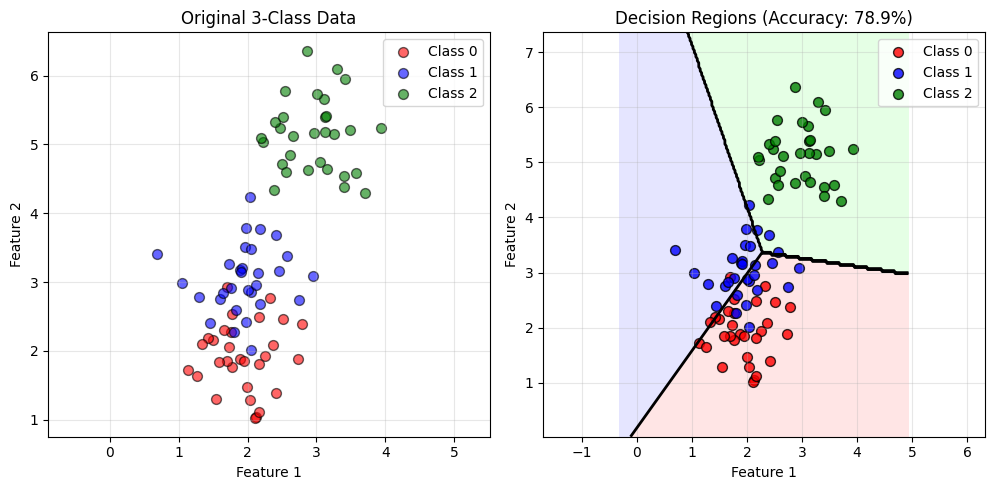

In [4]:
# Generate 3 classes of 2D data
np.random.seed(42)

# Class 0 (red): centered around (2, 2)
class0 = np.random.randn(30, 2) * 0.5 + np.array([2, 2])

# Class 1 (blue): centered around (5, 4)
#class1 = np.random.randn(30, 2) * 0.5 + np.array([5, 4])
class1 = np.random.randn(30, 2) * 0.5 + np.array([2, 3])

# Class 2 (green): centered around (3, 5)
class2 = np.random.randn(30, 2) * 0.5 + np.array([3, 5])

X_multi = np.vstack([class0, class1, class2])
X_multi_bias = np.column_stack([np.ones(len(X_multi)), X_multi])

# One-hot encode labels
y_multi = np.zeros((90, 3))
y_multi[0:30, 0] = 1   # Class 0
y_multi[30:60, 1] = 1  # Class 1
y_multi[60:90, 2] = 1  # Class 2

# Solve for weight matrix W (each column is weights for one class), using pseudoinverse function
W = np.linalg.pinv(X_multi_bias) @ y_multi

print(f"Weight matrix shape: {W.shape}")
print(f"Weight matrix W:")
print(W)

# Predict: choose class with highest score
def predict_multiclass(X, W):
    X_bias = np.column_stack([np.ones(len(X)), X])
    scores = X_bias @ W
    return np.argmax(scores, axis=1)

y_pred_multi = predict_multiclass(X_multi, W)
y_true_multi = np.argmax(y_multi, axis=1)

accuracy_multi = np.mean(y_pred_multi == y_true_multi)
print(f"\nMulti-class accuracy: {accuracy_multi * 100:.2f}%")

# Create visualizations
fig = plt.figure(figsize=(15, 5))

# Plot 1: Data points with predicted classes
ax1 = plt.subplot(1, 3, 1)
colors = ['red', 'blue', 'green']
class_names = ['Class 0', 'Class 1', 'Class 2']

for i in range(3):
    class_data = X_multi[y_true_multi == i]
    ax1.scatter(class_data[:, 0], class_data[:, 1], 
                c=colors[i], label=class_names[i], 
                alpha=0.6, edgecolors='k', s=50)

ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('Original 3-Class Data')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axis('equal')

# Plot 2: Decision regions
ax2 = plt.subplot(1, 3, 2)

# Create a mesh to plot decision boundaries
x1_min, x1_max = X_multi[:, 0].min() - 1, X_multi[:, 0].max() + 1
x2_min, x2_max = X_multi[:, 1].min() - 1, X_multi[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                        np.linspace(x2_min, x2_max, 200))

# Predict for each point in the mesh
grid_points = np.c_[xx1.ravel(), xx2.ravel()]
Z = predict_multiclass(grid_points, W)
Z = Z.reshape(xx1.shape)

# Plot decision regions
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
ax2.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap_light, levels=2)

# Plot data points
for i in range(3):
    class_data = X_multi[y_true_multi == i]
    ax2.scatter(class_data[:, 0], class_data[:, 1], 
                c=colors[i], label=class_names[i], 
                alpha=0.8, edgecolors='k', s=50)

# Plot decision boundaries (where scores are equal)
ax2.contour(xx1, xx2, Z, colors='black', linewidths=2, levels=[0.5, 1.5])

ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_title(f'Decision Regions (Accuracy: {accuracy_multi*100:.1f}%)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.axis('equal')

plt.tight_layout()
plt.show()